In [1]:
#Packages
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from smt.sampling_methods import LHS
import pandas as pd

plots_path = "./../../figures/samples/"

In [2]:
#       Training sampling (Temperature + Duration)
limits = np.array([[870, 1125], [1200, 9000]])
train_sample = LHS(xlimits=limits, random_state=42) # need random_state for repeatability.

num = 22
x_train = train_sample(num)

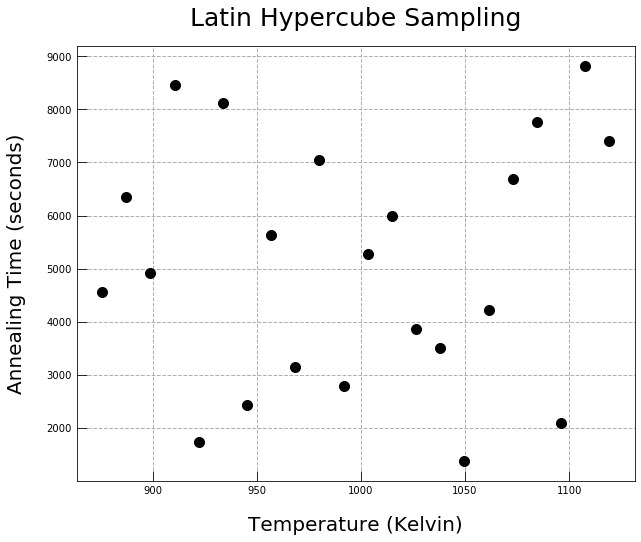

In [3]:
plt.rcParams["figure.figsize"] = (10,8)

plt.plot(x_train[:, 0], x_train[:, 1], "o", c='black', markersize=10, markeredgecolor='black')

plt.title('Latin Hypercube Sampling', fontsize=25, pad=20)

plt.xlabel("Temperature (Kelvin)", fontsize=20, labelpad=20)
plt.ylabel("Annealing Time (seconds)", fontsize=20, labelpad=20)

label_size = 15
plt.rcParams['xtick.labelsize'] = label_size
plt.rcParams['ytick.labelsize'] = label_size
plt.tick_params(axis="both",size=10, direction="in", pad=5)

plt.grid(which='major', axis='both', linestyle='--', linewidth=1)

#plt.savefig(plots_path + 'training_samples.png', facecolor='w', dpi=600)
plt.show()

In [4]:
#Save csv
df_train = pd.DataFrame(x_train)
df_train.to_csv(r'.\training_samples.csv')

In [5]:
#       Testing sampling
limits = limits #same limits
test_samples = LHS(xlimits=limits, random_state=42)

num_b = 8
x_test = test_samples(num_b)

In [6]:
df_test = pd.DataFrame(x_test)
df_test.to_csv(r'.\testing_samples.csv')

In [7]:
df_train.columns = ['Temperature', 'Duration']
df_test.columns = ['Temperature', 'Duration']
df_train.head(22)

,Temperature,Duration
0,922.159091,1731.818182
1,898.977273,4922.727273
2,991.704545,2795.454545
3,875.795455,4568.181818
4,968.522727,3150.000000
5,1096.022727,2086.363636
6,945.340909,2440.909091
7,1014.886364,5986.363636
8,1026.477273,3859.090909
9,1003.295455,5277.272727


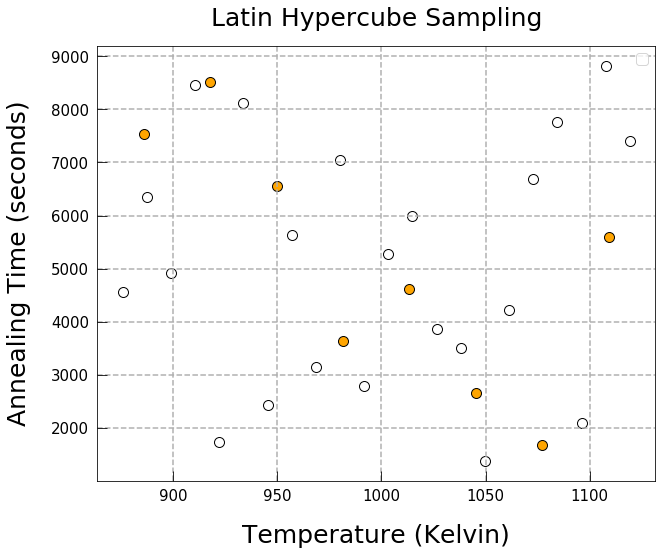

In [8]:
plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = (10,8)

ax = df_train.plot.scatter(x='Temperature', y='Duration', color='white', s=100, linewidth=1, marker='o', edgecolor='black')
df_test.plot.scatter(ax=ax, x='Temperature', y='Duration', color='orange', s=100, linewidth=1, marker='o', edgecolor='black')

plt.title('Latin Hypercube Sampling', fontsize=25, pad=20)

plt.xlabel("Temperature (Kelvin)", fontsize=25, labelpad=20)
plt.ylabel("Annealing Time (seconds)", fontsize=25, labelpad=20)

label_size = 15
plt.rcParams['xtick.labelsize'] = label_size
plt.rcParams['ytick.labelsize'] = label_size
plt.tick_params(axis="both",size=10, direction="in", pad=8)

plt.legend('')

plt.grid(which='major', axis='both', linestyle='--', linewidth=1.5)

#plt.savefig(plots_path + 'full_sample.png', facecolor='w', dpi=600)
plt.show()

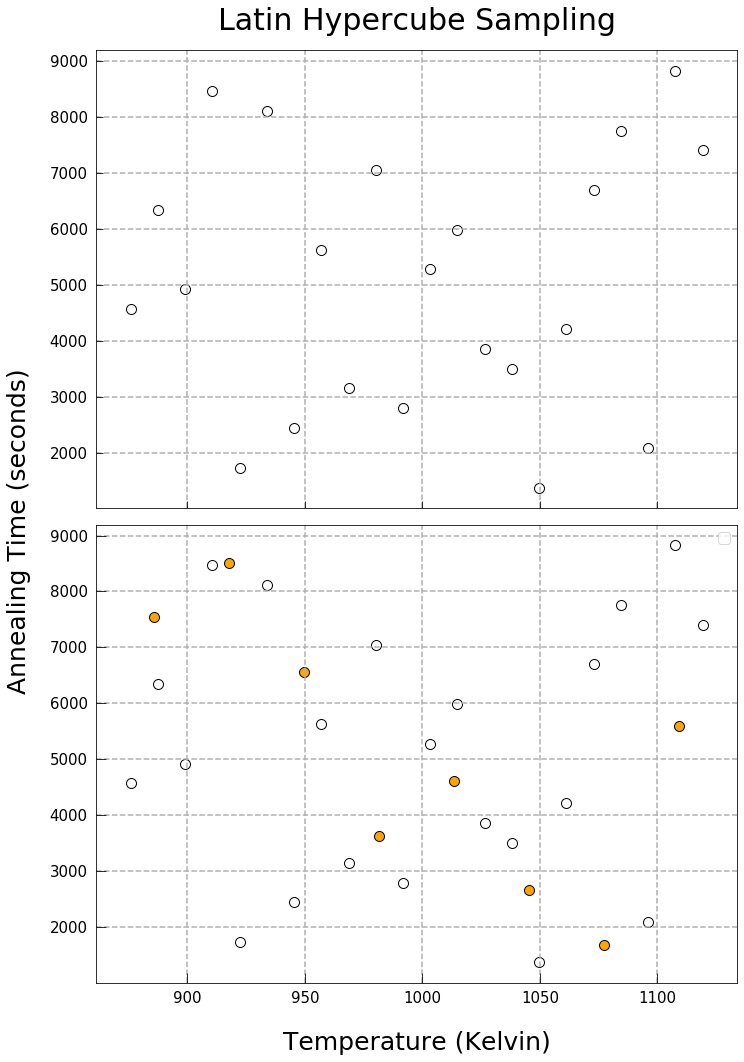

In [9]:
plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = (12, 5)

fig=plt.figure(figsize=(10, 15))

ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)

ax1.set_title('Latin Hypercube Sampling', fontsize=30, pad=20)

ax1.scatter(df_train['Temperature'], df_train['Duration'], color='white', s=100, linewidth=1, marker='o', edgecolor='black')

ax2.scatter(df_train['Temperature'], df_train['Duration'], color='white', s=100, linewidth=1, marker='o', edgecolor='black')
ax2.scatter(df_test['Temperature'], df_test['Duration'], color='orange', s=100, linewidth=1, marker='o', edgecolor='black')

ax1.grid(axis='both', linestyle='--', linewidth=1.5)
ax2.grid(axis='both', linestyle='--', linewidth=1.5)

label_size = 20
plt.rcParams['xtick.labelsize'] = label_size
plt.rcParams['ytick.labelsize'] = label_size
plt.tick_params(axis="both", size=10, direction="in", pad=8)

ax1.tick_params(labelbottom=False, size=7, direction="in", pad=8)

plt.legend('')

plt.xlabel("Temperature (Kelvin)", fontsize=25, labelpad=25, horizontalalignment='center')

fig.text(-0.02, 0.5, 'Annealing Time (seconds)', fontsize=25, ha='center', va='center', rotation='vertical')
plt.tight_layout()

plt.savefig(plots_path + 'full_sample_b.png', bbox_inches = 'tight', facecolor='w', dpi=600)
plt.show()